<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Course GML - CRAPAUDUC Project

In [1]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns

## Data importation

In [30]:
# Import labels file 
df_labels = pd.read_csv('data/path_and_bounding_box.csv')
df_labels.head()

,class,top_left_x,top_left_y,w,h,img_size_x,img_size_y,name,date,takes,path
0,grenouille-crapaud,1242,236,208,343,1920,1080,2017-03-10T02:20:00.jpg,2017-03-10 02:20:00,474,camera_06_unnested/2017-03-10T02_20_00.jpg
1,grenouille-crapaud,1242,191,214,279,1920,1080,2017-03-10T02:20:01.jpg,2017-03-10 02:20:01,474,camera_06_unnested/2017-03-10T02_20_01.jpg
2,grenouille-crapaud,1312,101,141,307,1920,1080,2017-03-10T02:20:02.jpg,2017-03-10 02:20:02,474,camera_06_unnested/2017-03-10T02_20_02.jpg
3,grenouille-crapaud,1151,340,220,239,1920,1080,2017-03-10T02:20:22.jpg,2017-03-10 02:20:22,475,camera_06_unnested/2017-03-10T02_20_22.jpg
4,grenouille-crapaud,1151,334,200,234,1920,1080,2017-03-10T02:20:23.jpg,2017-03-10 02:20:23,475,camera_06_unnested/2017-03-10T02_20_23.jpg


In [3]:
df_labels['class'].value_counts()

feuille               1085
insect                 270
triton                 225
grenouille-crapaud     201
souris                 197
plastic                 38
oiseau                   3
animal                   2
Name: class, dtype: int64

## Data preparation

In [4]:
# Search for missing values
df_labels.isnull().sum()

class         0
top_left_x    0
top_left_y    0
w             0
h             0
img_size_x    0
img_size_y    0
name          0
date          0
takes         0
path          0
dtype: int64

In [5]:
type(df_labels['date'][0])

str

In [6]:
# String to datetime so we can work with numbers (order them, ...)
df_labels['dateheure'] = [dt.strptime(df_labels['date'][i], '%Y-%m-%d %H:%M:%S') for i in range(len(df_labels['date']))]
df_labels['dateheure'].head()

0   2017-03-10 02:20:00
1   2017-03-10 02:20:01
2   2017-03-10 02:20:02
3   2017-03-10 02:20:22
4   2017-03-10 02:20:23
Name: dateheure, dtype: datetime64[ns]

## Exploratory analysis

### Counts and relative percentage of quantity observed, for each label

In [9]:
# Percentage of each label in dataframe 
print(df_labels['dateheure'][0].date())

2017-03-10


In [10]:
# Number of dates registered
pd.Series([d.date() for d in df_labels['dateheure']]).value_counts()

2017-04-05    910
2017-04-06    266
2017-04-01    260
2017-03-09    153
2017-04-15     98
2017-04-13     83
2017-03-15     47
2017-03-13     41
2017-03-14     36
2017-03-23     32
2017-03-22     28
2017-03-11     24
2017-03-12     19
2017-03-10     10
2017-03-16      8
2017-03-19      6
dtype: int64

### Observation per date per label

In [11]:
# Creation of a column storing the date in format yyyy-mm-dd
df_labels['y_m_d'] = [d.date() for d in df_labels['dateheure']]

<AxesSubplot:xlabel='y_m_d', ylabel='Count'>

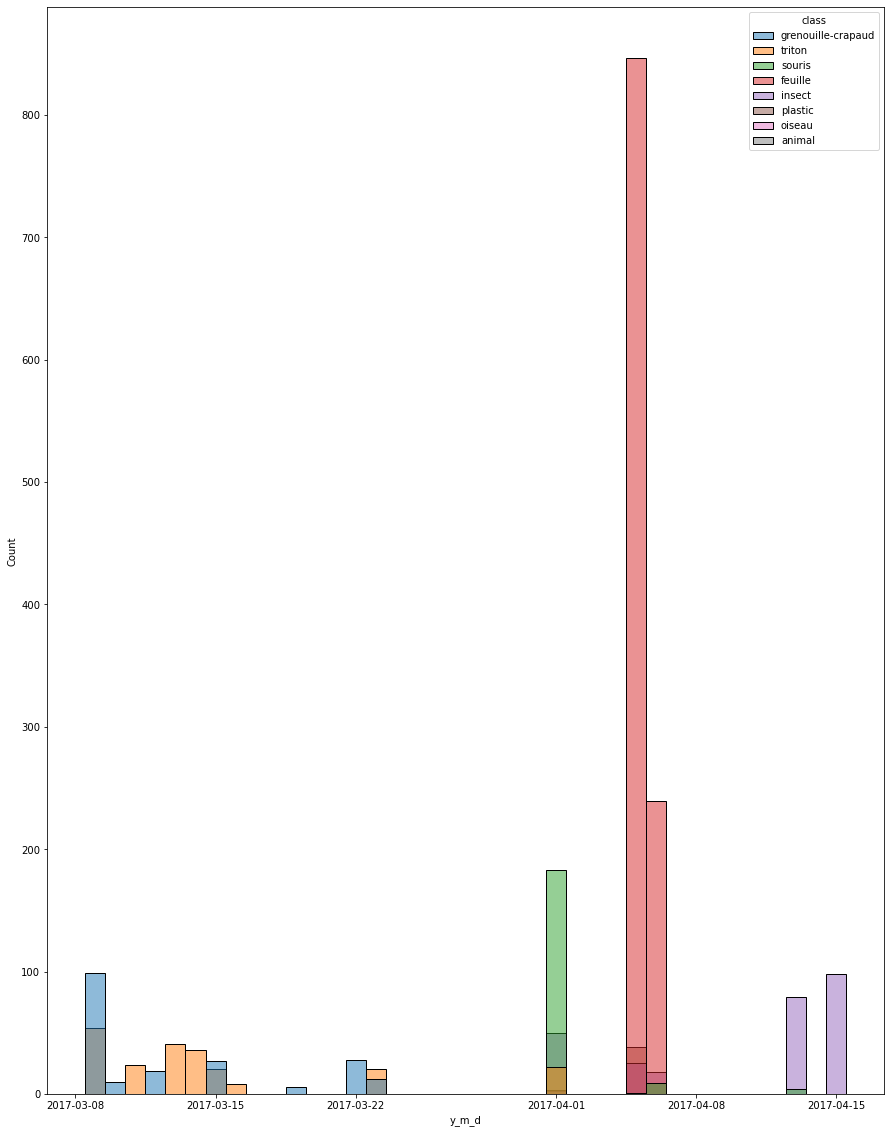

In [12]:
plt.figure(figsize=(15,20))
sns.histplot(data=df_labels, x='y_m_d', hue='class')

### Labels observed (date - time - number of observation)

In [13]:
# Creation of a dataframe containing only the samples where we saw a frog-toad or a triton
df_activated_label = df_labels.loc[(df_labels['class']=='grenouille-crapaud') | (df_labels['class']=='triton')]
df_activated_label['class'].value_counts()

triton                225
grenouille-crapaud    201
Name: class, dtype: int64

In [14]:
# Size of new dataframe 
df_activated_label.shape

(426, 17)

In [15]:
# Dates at which frog-toad or triton were seen
# Number of dates registered
pd.Series(df_activated_label['y_m_d']).value_counts()

2017-03-09    153
2017-03-15     47
2017-03-13     41
2017-03-14     36
2017-03-23     32
2017-03-22     28
2017-03-11     24
2017-04-01     22
2017-03-12     19
2017-03-10     10
2017-03-16      8
2017-03-19      6
Name: y_m_d, dtype: int64

/var/folders/zg/9zpxgr6n3d358_qwx52_x__h0000gn/T/ipykernel_31477/510979837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_activated_label['h_m_s']  = [d.time() for d in df_activated_label['dateheure']]


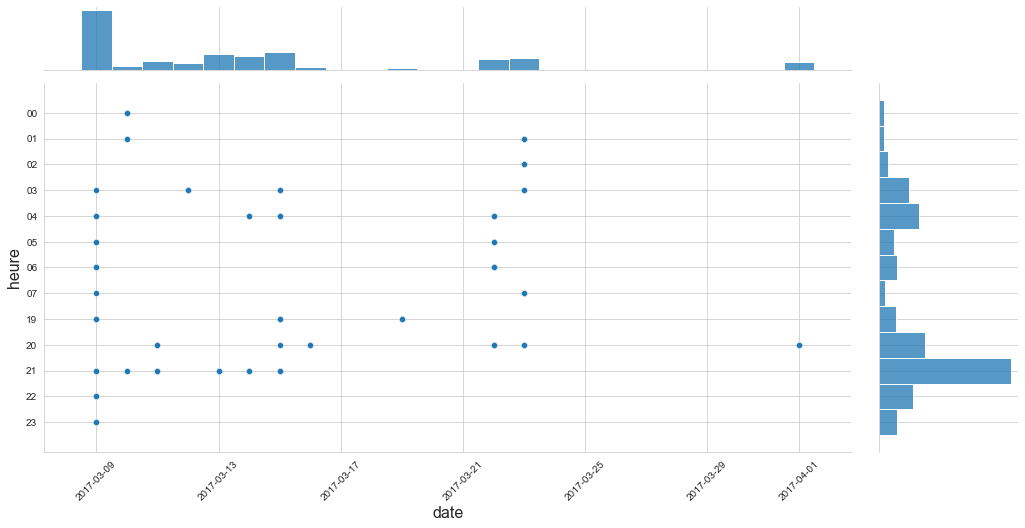

In [17]:
# Regroupement des données par heure d'observation

# Reprise du df avec les données labellées pour le trier par heures croissantes
df_activated_label['h_m_s']  = [d.time() for d in df_activated_label['dateheure']]
df_activated_sorted_h = df_activated_label.sort_values(by=['h_m_s'])

# Pour n'avoir que les heures pleines sur l'axe des y
y = [k.strftime('%H') for k in df_activated_sorted_h['h_m_s']]

sns.set_style("whitegrid")

plot = sns.jointplot(data=df_activated_label, x='y_m_d', y=y)
plot.set_axis_labels('date', 'heure', fontsize=16)

plot.ax_joint.tick_params(axis="x", rotation=45)

plot.fig.set_figwidth(15)
plot.fig.set_figheight(7)

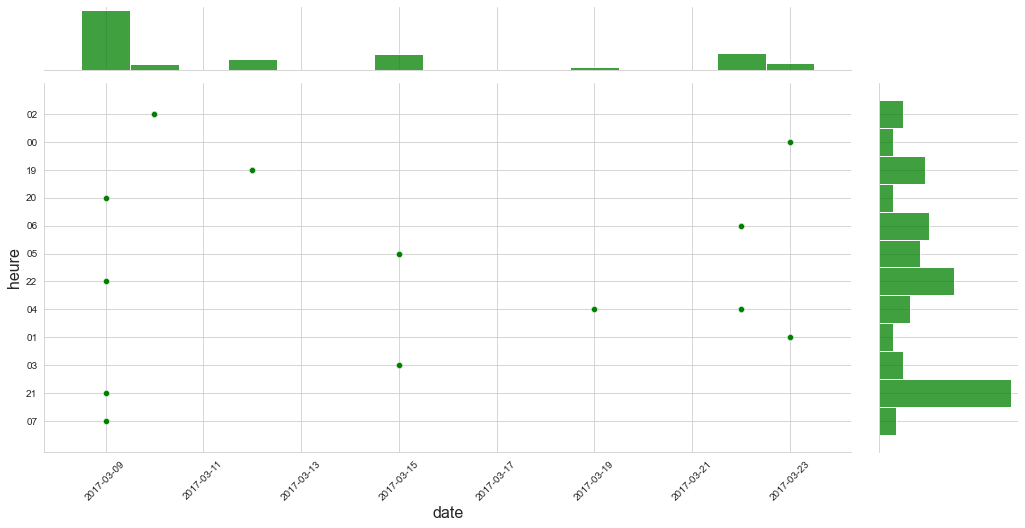

In [23]:
# Obersvations (date-heure) pour le label grenouille-crapaud

df_g_c = df_activated_label.loc[df_activated_label['class']=='grenouille-crapaud']
y      = [k.strftime('%H') for k in df_g_c['h_m_s']]

sns.set_style("whitegrid")

plot = sns.jointplot(data=df_g_c, x='y_m_d', y=y, color='g')

plot.set_axis_labels('date', 'heure', fontsize=16)

plot.ax_joint.tick_params(axis="x", rotation=45)

plot.fig.set_figwidth(15)
plot.fig.set_figheight(7)

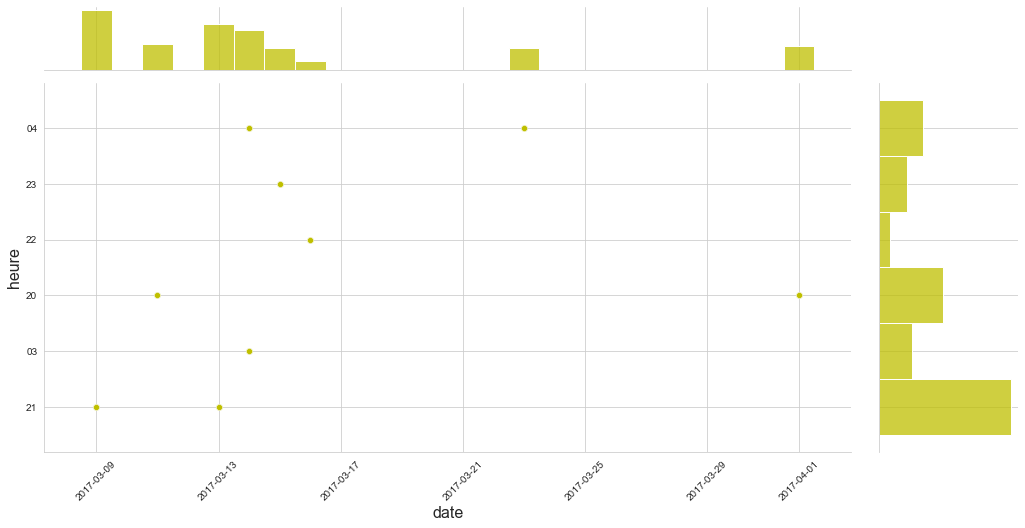

In [24]:
# Obersvations (date-heure) pour le label triton

df_t = df_activated_label.loc[df_activated_label['class']=='triton']
y    = [k.strftime('%H') for k in df_t['h_m_s']]

sns.set_style("whitegrid")

plot = sns.jointplot(data=df_t, x='y_m_d', y=y, color='y')

plot.set_axis_labels('date', 'heure', fontsize=16)

plot.ax_joint.tick_params(axis="x", rotation=45)

plot.fig.set_figwidth(15)
plot.fig.set_figheight(7)

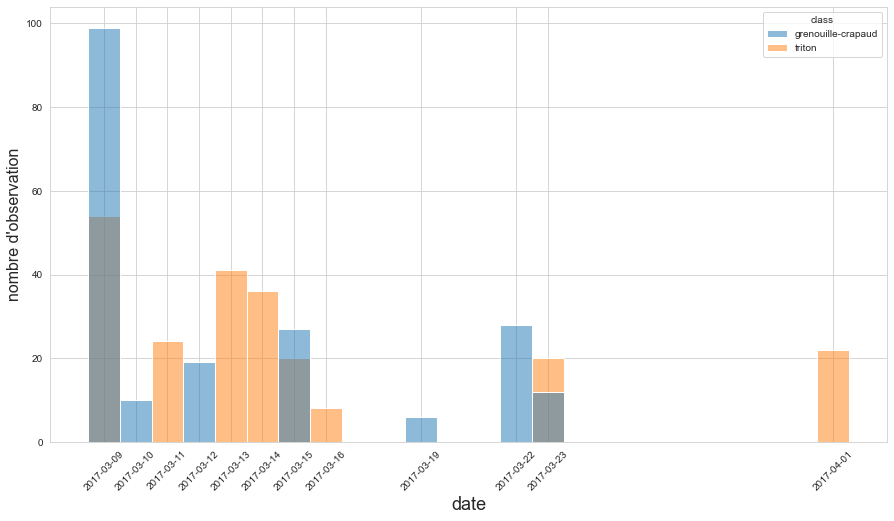

In [27]:
# Histogramme de nombre d'animaux (grenouille/crapaud/triton) captés par jour

plt.figure(figsize=(15,8))

sns.histplot(data=df_activated_label, x='y_m_d', hue='class')
plt.xticks(df_activated_label.date.unique(), rotation=45)

plt.xlabel('date', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

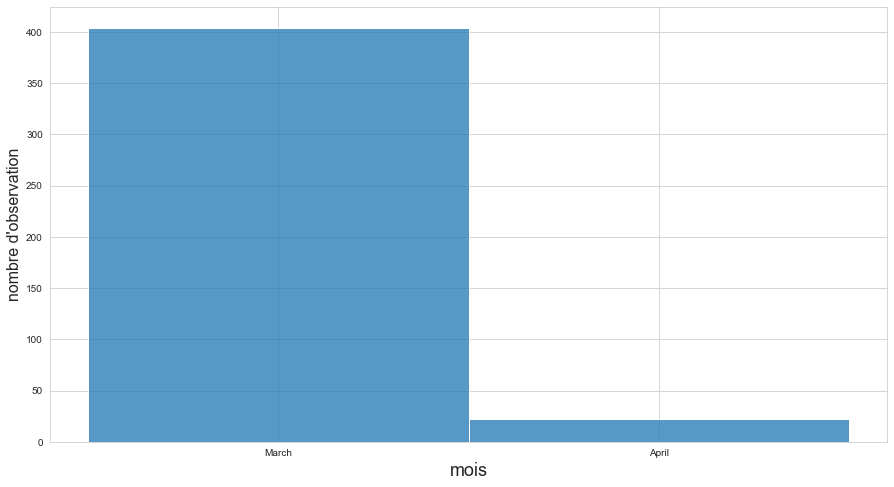

In [29]:
plt.figure(figsize=(15,8))

sns.histplot(data=df_activated_label, x='mois')

plt.xlabel('mois', fontsize=18)
plt.ylabel('nombre d\'observation', fontsize=16)

plt.show()

## Ajout des données météorologiques

In [31]:
df_meteo = pd.read_csv('data/meteo.csv')
df_meteo.head()

,date,temperature_celcius,wind_km/h,pressure_millibar,precipitation_mm,rain_bool,humidity
0,2017-02-24,6,13,1014.50,0.0,True,53
1,2017-03-07,4,7,1018.82,2.0,True,84
2,2017-04-15,12,6,1018.21,0.0,True,58
3,2017-04-30,9,4,1010.28,0.1,True,61
4,2017-06-10,20,5,1019.35,0.0,False,61


In [ ]:
# Ajouter les données de pluie mnt !!

In [ ]:
# Idée pour plus tard : dissocier les graphiques suivant les combinaisons d'animaux repérés
# sns.histplot(data=df_activated_label, x='date', hue='c_g_t')

# Remaining questions : 
# - quand on a plusieurs photos a la suite => plusieurs données alors qu'une observation 
# - météo : pas assez de données => on laisse tomber ? Check avec les données de bounding box de Joris

Regrouper les données par heure : 
- ébauche de groupby : https://codenostra.com/fr/comment-regrouper-les-dataframes-par-heure-en-utilisant-lhorodatage-avec-pandas.html
